In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


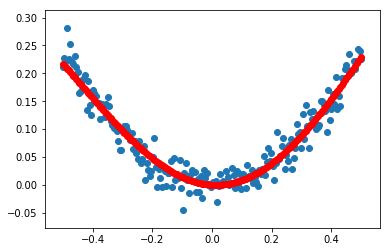

In [6]:
# 使用numpy来生产200个随机点
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise
#定义两个placeholder
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 定义一个中间层
# 定义权值矩阵和偏置矩阵, 此处有10个神经元。1个输入，对应到10个神经元，权值和偏置就是1行10列
weight_l1 = tf.Variable(tf.random_normal([1, 10]))
bias_l1 = tf.Variable(tf.zeros([1, 10])) # 一个神经元对应一个偏置
# 定义中间层的操作
op_l1 = tf.matmul(x, weight_l1) + bias_l1
# wx+b后通过激活函数，此处用双曲正切函数
active_l1 = tf.nn.tanh(op_l1)

# 定义输出层，输出层一个神经元，即10个输入得到一个输出。权值和偏置为10行1列
weight_l2 = tf.Variable(tf.random_normal([10, 1]))
bias_l2 = tf.Variable(tf.zeros([1, 1]))
# 输出层操作
op_l2 = tf.matmul(active_l1, weight_l2) + bias_l2
# 经过激活函数，得到预测结果
predict = tf.nn.tanh(op_l2)

# 二次代价函数，即计算差值loss
loss = tf.reduce_mean(tf.square(y-predict))

# 定义训练
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 开启会话
with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    # 训练
    for _ in range(2000):
        sess.run(train, feed_dict={x:x_data, y:y_data}) # 将样本x和y传入训练
        
    # 用x_data来测试训练的模型得到的y_data
    prediction = sess.run(predict, feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data, y_data) # 输出样本点
    plt.scatter(x_data, prediction, c='r', lw=1) # 输出预测值
    plt.show()
        
    